In [3]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For selecting optimum features
from sklearn.ensemble import ExtraTreesClassifier

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# for evaluating the model performance
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# set style for the plots
sns.set_theme(style="darkgrid")

In [4]:
# importing the dataset
df = pd.read_csv(r"C:\Codes\data analytics udemy\customer_churn project\dataset\internet_service_churn.csv")
df.head() # see the top 5 rows of the dataset

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [5]:
# Checking the shape of the dataset
df.shape

(72274, 11)

The dataset has 72274 rows and 11 columns at all.

In [6]:
# checking basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


Here most of the features has integer and float datatype but some may shoule as category which will checked later. For now let's check the null values.

Some variable like "reamining_contract" has 29% missing values. Other two variables "download_avg" & "upload_av" has also a little missing value and their percetage is same 0.52%

## Exploratory Data Analysis (EDA)


C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\1306780627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')


[]

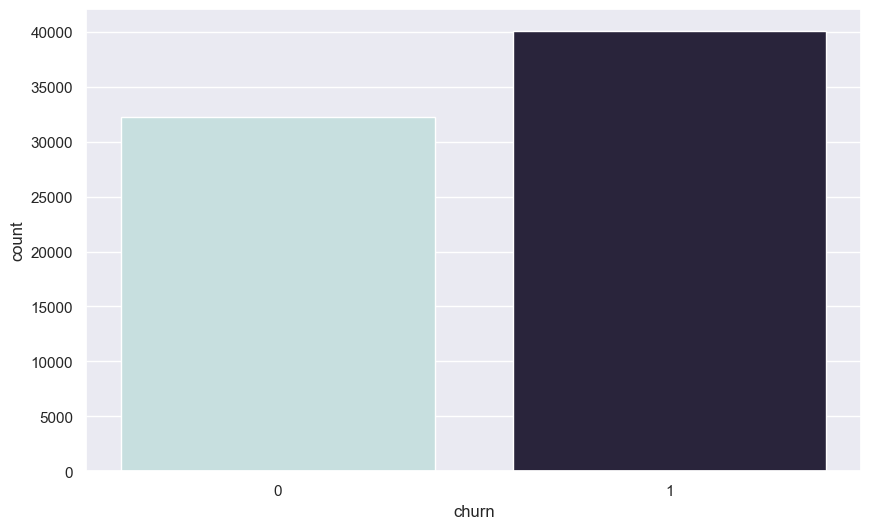

In [7]:
# First let's see how much customer are already churned

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')
plt.plot()

In [8]:
df['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

From the above visualization and "counted number" it can be interpreted that most of customer has already cancelled the service.

In [9]:
# Now let's check if the customer has "tv_subscription" who has cancelled the service

# First check the number of TV subscriber and not subscriberr
df['is_tv_subscriber'].value_counts()

is_tv_subscriber
1    58922
0    13352
Name: count, dtype: int64

Here we can see that most of the customer has "TV Subscription" Let's see this with a plot

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\1028939023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'is_tv_subscriber', palette= 'ch:start=.2,rot=-.3')


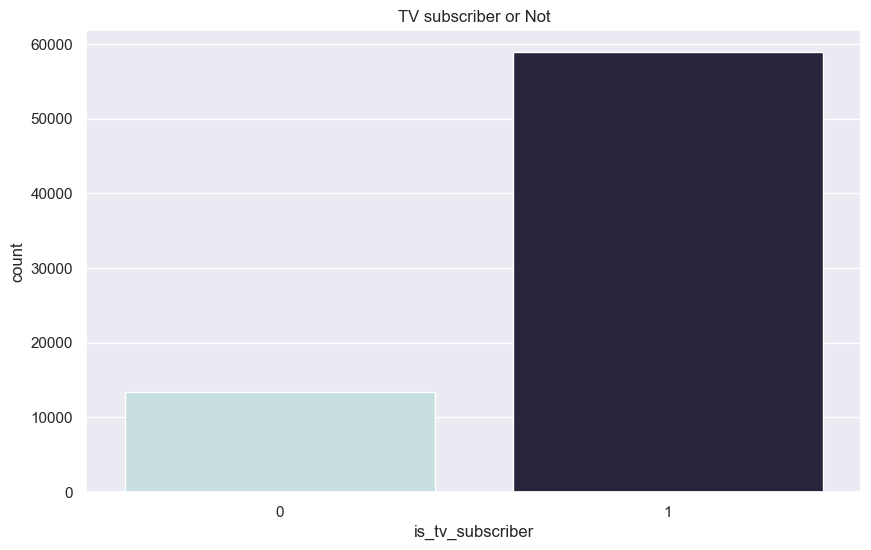

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'is_tv_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('TV subscriber or Not')
plt.show()

In [11]:
# Now let's check if the customers has a "Movie Package subscription" or not
# First we'll see the number of counts and then will see a visual graph for this
df['is_movie_package_subscriber'].value_counts()

is_movie_package_subscriber
0    48089
1    24185
Name: count, dtype: int64

Here only one third of the customer has "Movie Package Subscription" and rest don't have any. Let's see with a countplot



C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\1505712931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'is_movie_package_subscriber', palette= 'ch:start=.2,rot=-.3')


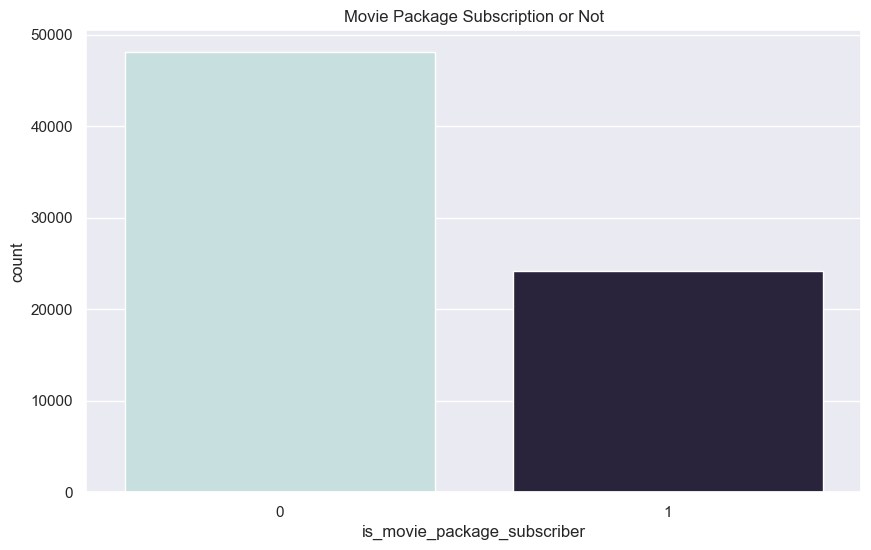

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(data =df, x = 'is_movie_package_subscriber', palette= 'ch:start=.2,rot=-.3')
plt.title('Movie Package Subscription or Not')
plt.show()

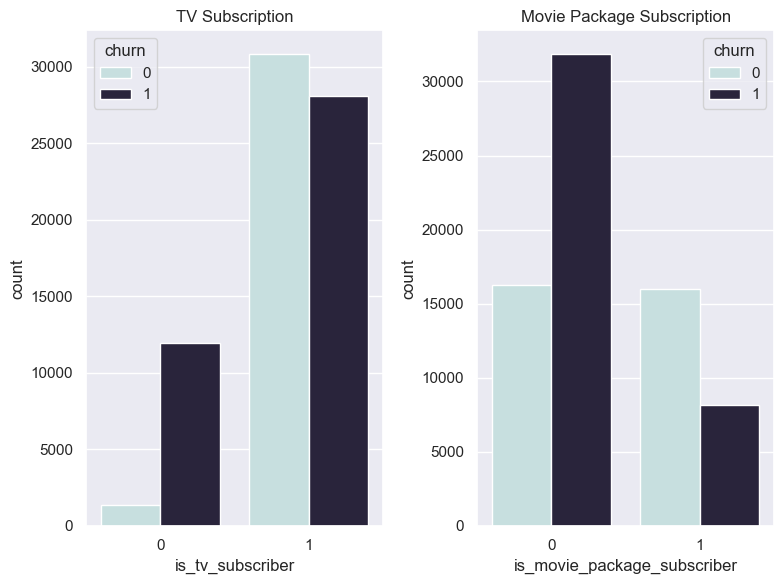

In [13]:
# creating subplot
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Tv subscription or not
sns.countplot(data = df, x = 'is_tv_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[0])
axes[0].set_title("TV Subscription")

# Movie package subscription or not
sns.countplot(data = df, x = 'is_movie_package_subscriber', hue = 'churn', palette= 'ch:start=.2,rot=-.3', ax=axes[1])
axes[1].set_title('Movie Package Subscription')
fig.tight_layout()

Here we can see the customers who has 'tv subscription' cancelled the service. But the customer who cancelled the service doesn't have movie pack subscription so much

In [14]:
# Now, let's check for  service_failure_count features
# first check the unique category
print(df['service_failure_count'].unique())
print(df['service_failure_count'].value_counts())

[ 0  1  2  6  4 10  5  3  8  7 11  9 13 14 15 19 18 12 16]
service_failure_count
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
18        1
19        1
Name: count, dtype: int64


C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3019288666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')


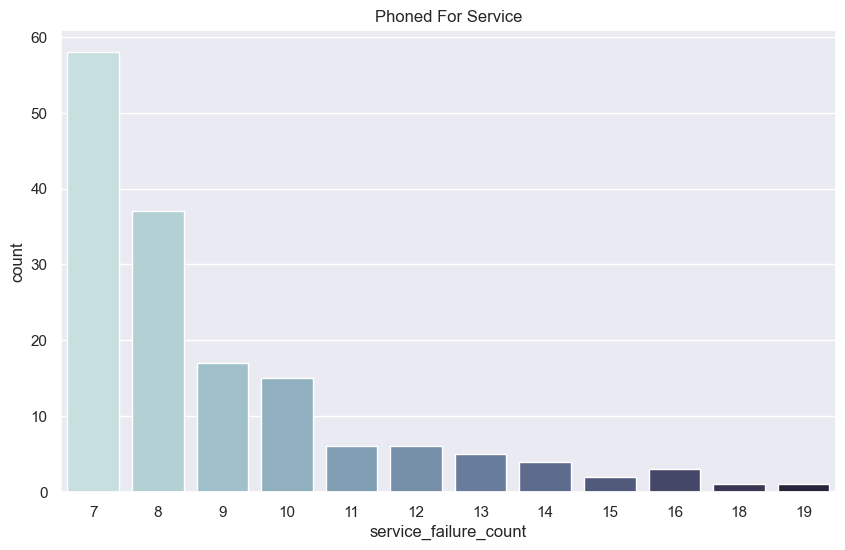

In [15]:
# Let's see how much customer phoned for service more than 6 times in last 3 months

data = df[df['service_failure_count'] > 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')
plt.title('Phoned For Service')
plt.show()

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3074984936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')


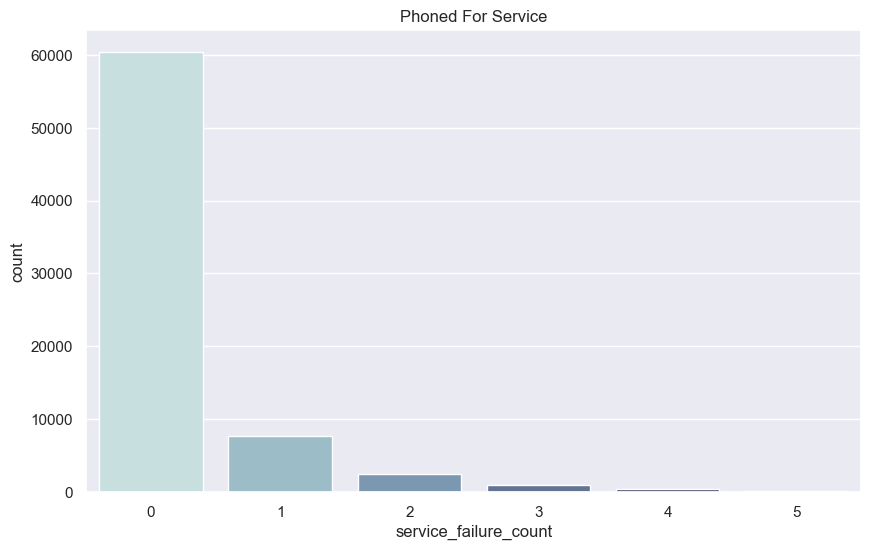

In [16]:
# Here we can see only a few customer phoned more than 6 times within last 3 months.
# which means most of the customer didn't phone much.

# Let's see how much customer phoned for service less than 6 times in last 3 months
data = df[df['service_failure_count'] < 6]
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'service_failure_count', palette= 'ch:start=.2,rot=-.3')
plt.title('Phoned For Service')
plt.show()

Impressive. Most of the customer didn't phone at least once within last three months

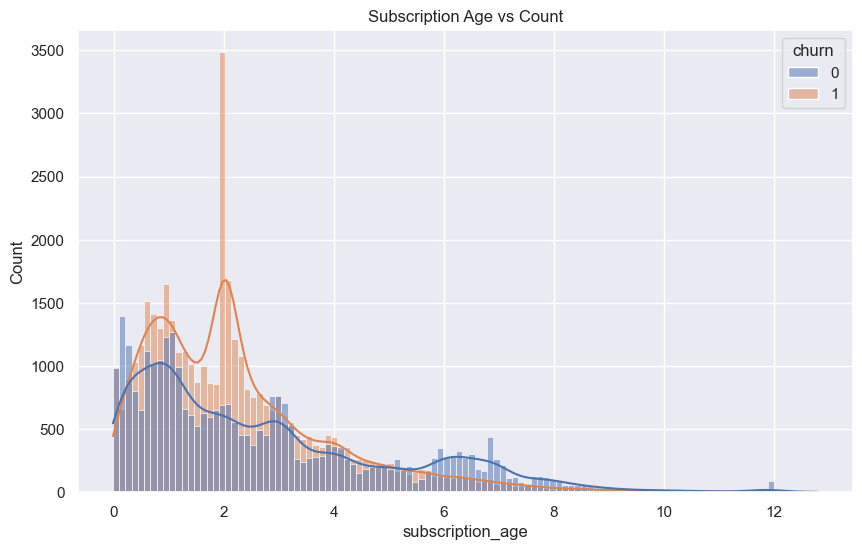

In [17]:
# Now let's check the 'subscription age' and how it is distributed
# I'll use hisagram for that

plt.figure(figsize = (10,6))
sns.histplot(data = df, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

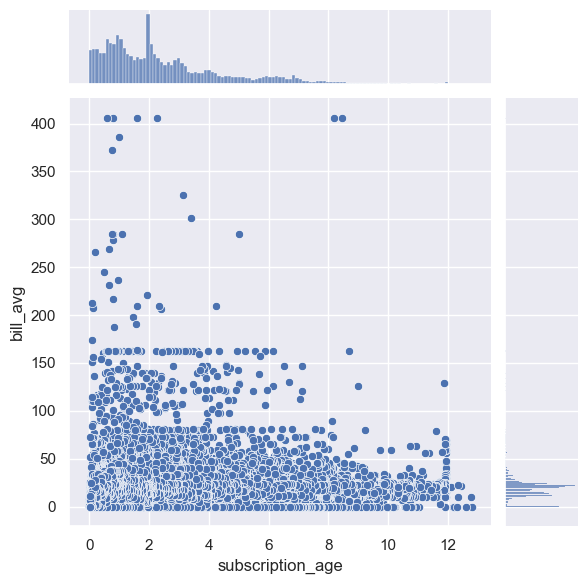

In [18]:
# Now let's use a jointplot to see the age and avg bill at time
plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'subscription_age', y = 'bill_avg', kind =  'scatter', palette= 'ch:start=.2,rot=-.3')
plt.show()

Here we can see that most of the customer who has just started the service has higher average bill and most older customer has lower average bill. This is not a very important interpretation because it can be depend on the speed and package the customer has.

Now let's check the average download and upload limit

<Figure size 1000x600 with 0 Axes>

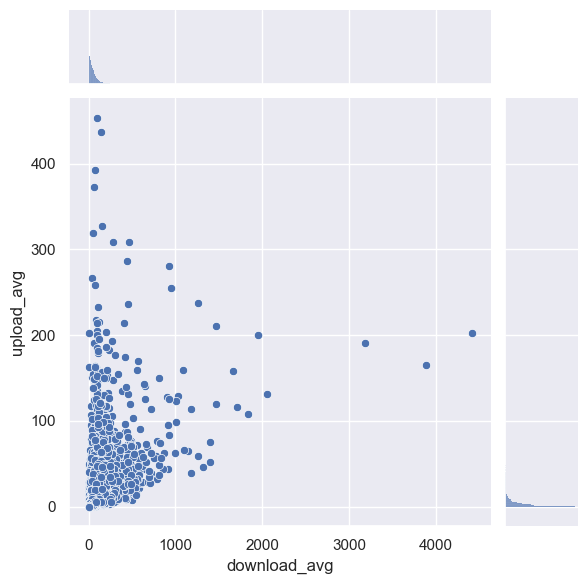

In [19]:
plt.figure(figsize = (10,6))
sns.jointplot(data = df, x = 'download_avg', y = 'upload_avg', kind =  'scatter', palette= 'ch:start=.2,rot=-.3')
plt.show()

Here most of the download and upload speed relay within 1000 and 100 and we there are some exceptional data point which may be outliers in the dataset.

In [20]:
# Let's use boxplot to see if there is outliers in the dataset.
# for this I'll use a function to make it easy
def boxplot_(var):
    plt.figure(figsize = (10,7))
    sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')
    plt.show()

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3705994524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')


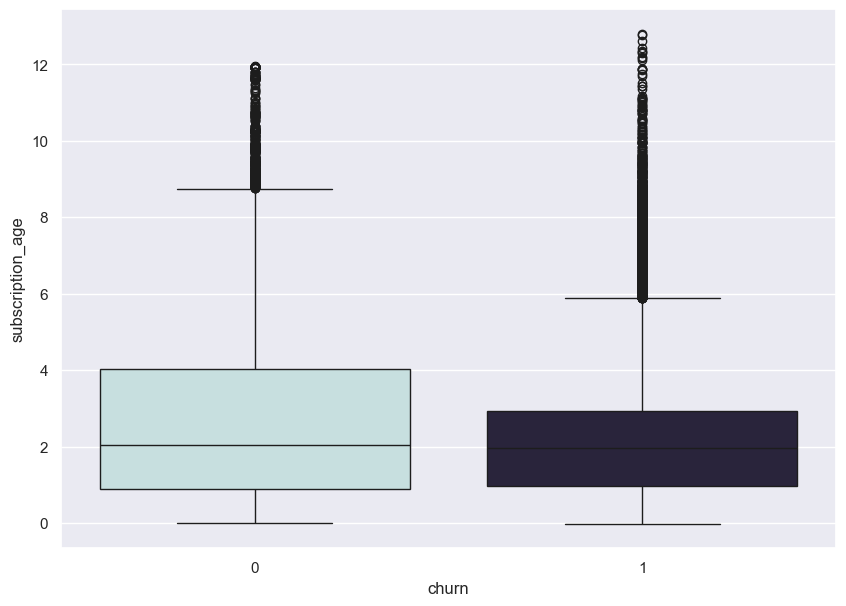

In [21]:
boxplot_('subscription_age')

For the 'subscription_age' there are so many outlier. Let's check for other variables

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3705994524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')


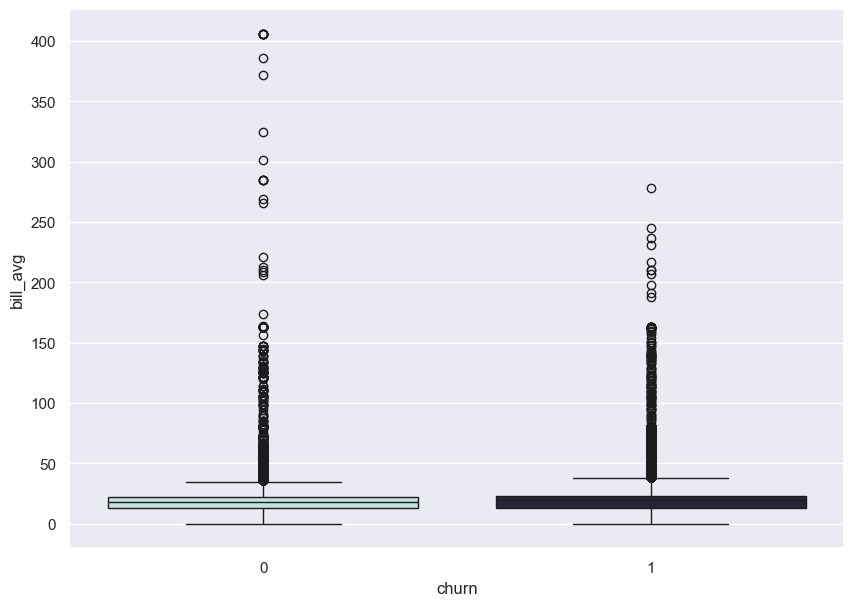

In [22]:
# for average bill
boxplot_('bill_avg')

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3705994524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')


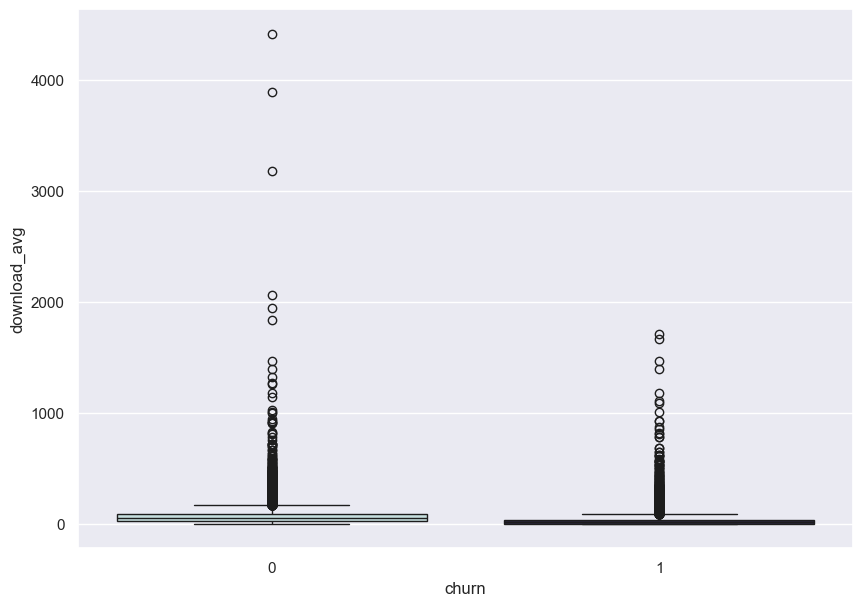

In [23]:
# for download_avg
boxplot_('download_avg')

C:\Users\sam82\AppData\Local\Temp\ipykernel_17080\3705994524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = var, data = df, x = 'churn', palette= 'ch:start=.2,rot=-.3')


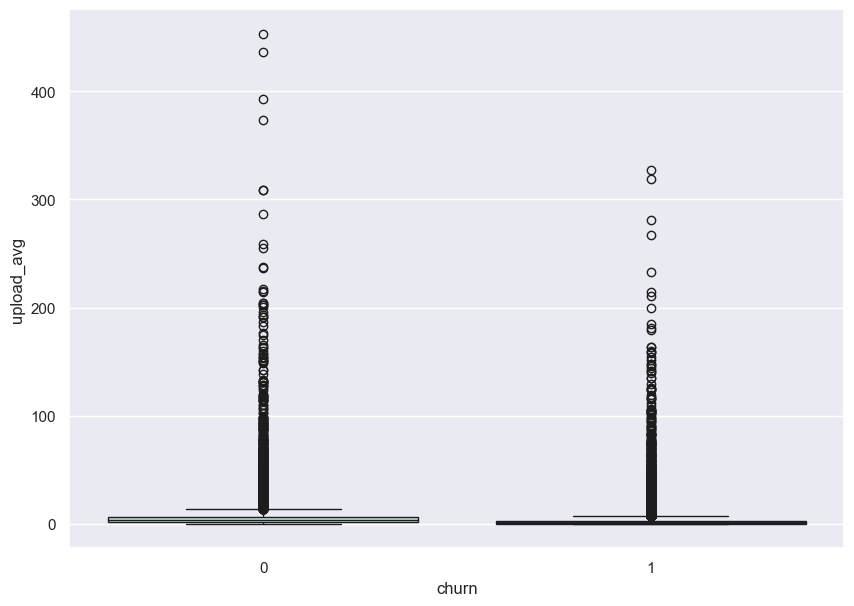

In [24]:
boxplot_('upload_avg')

From above we can see for each feature we've some outliers. we'll take care of them in feature engineering section.

Now let's use a pairplot to see all features at a glance and also a heatmap to see the correlation

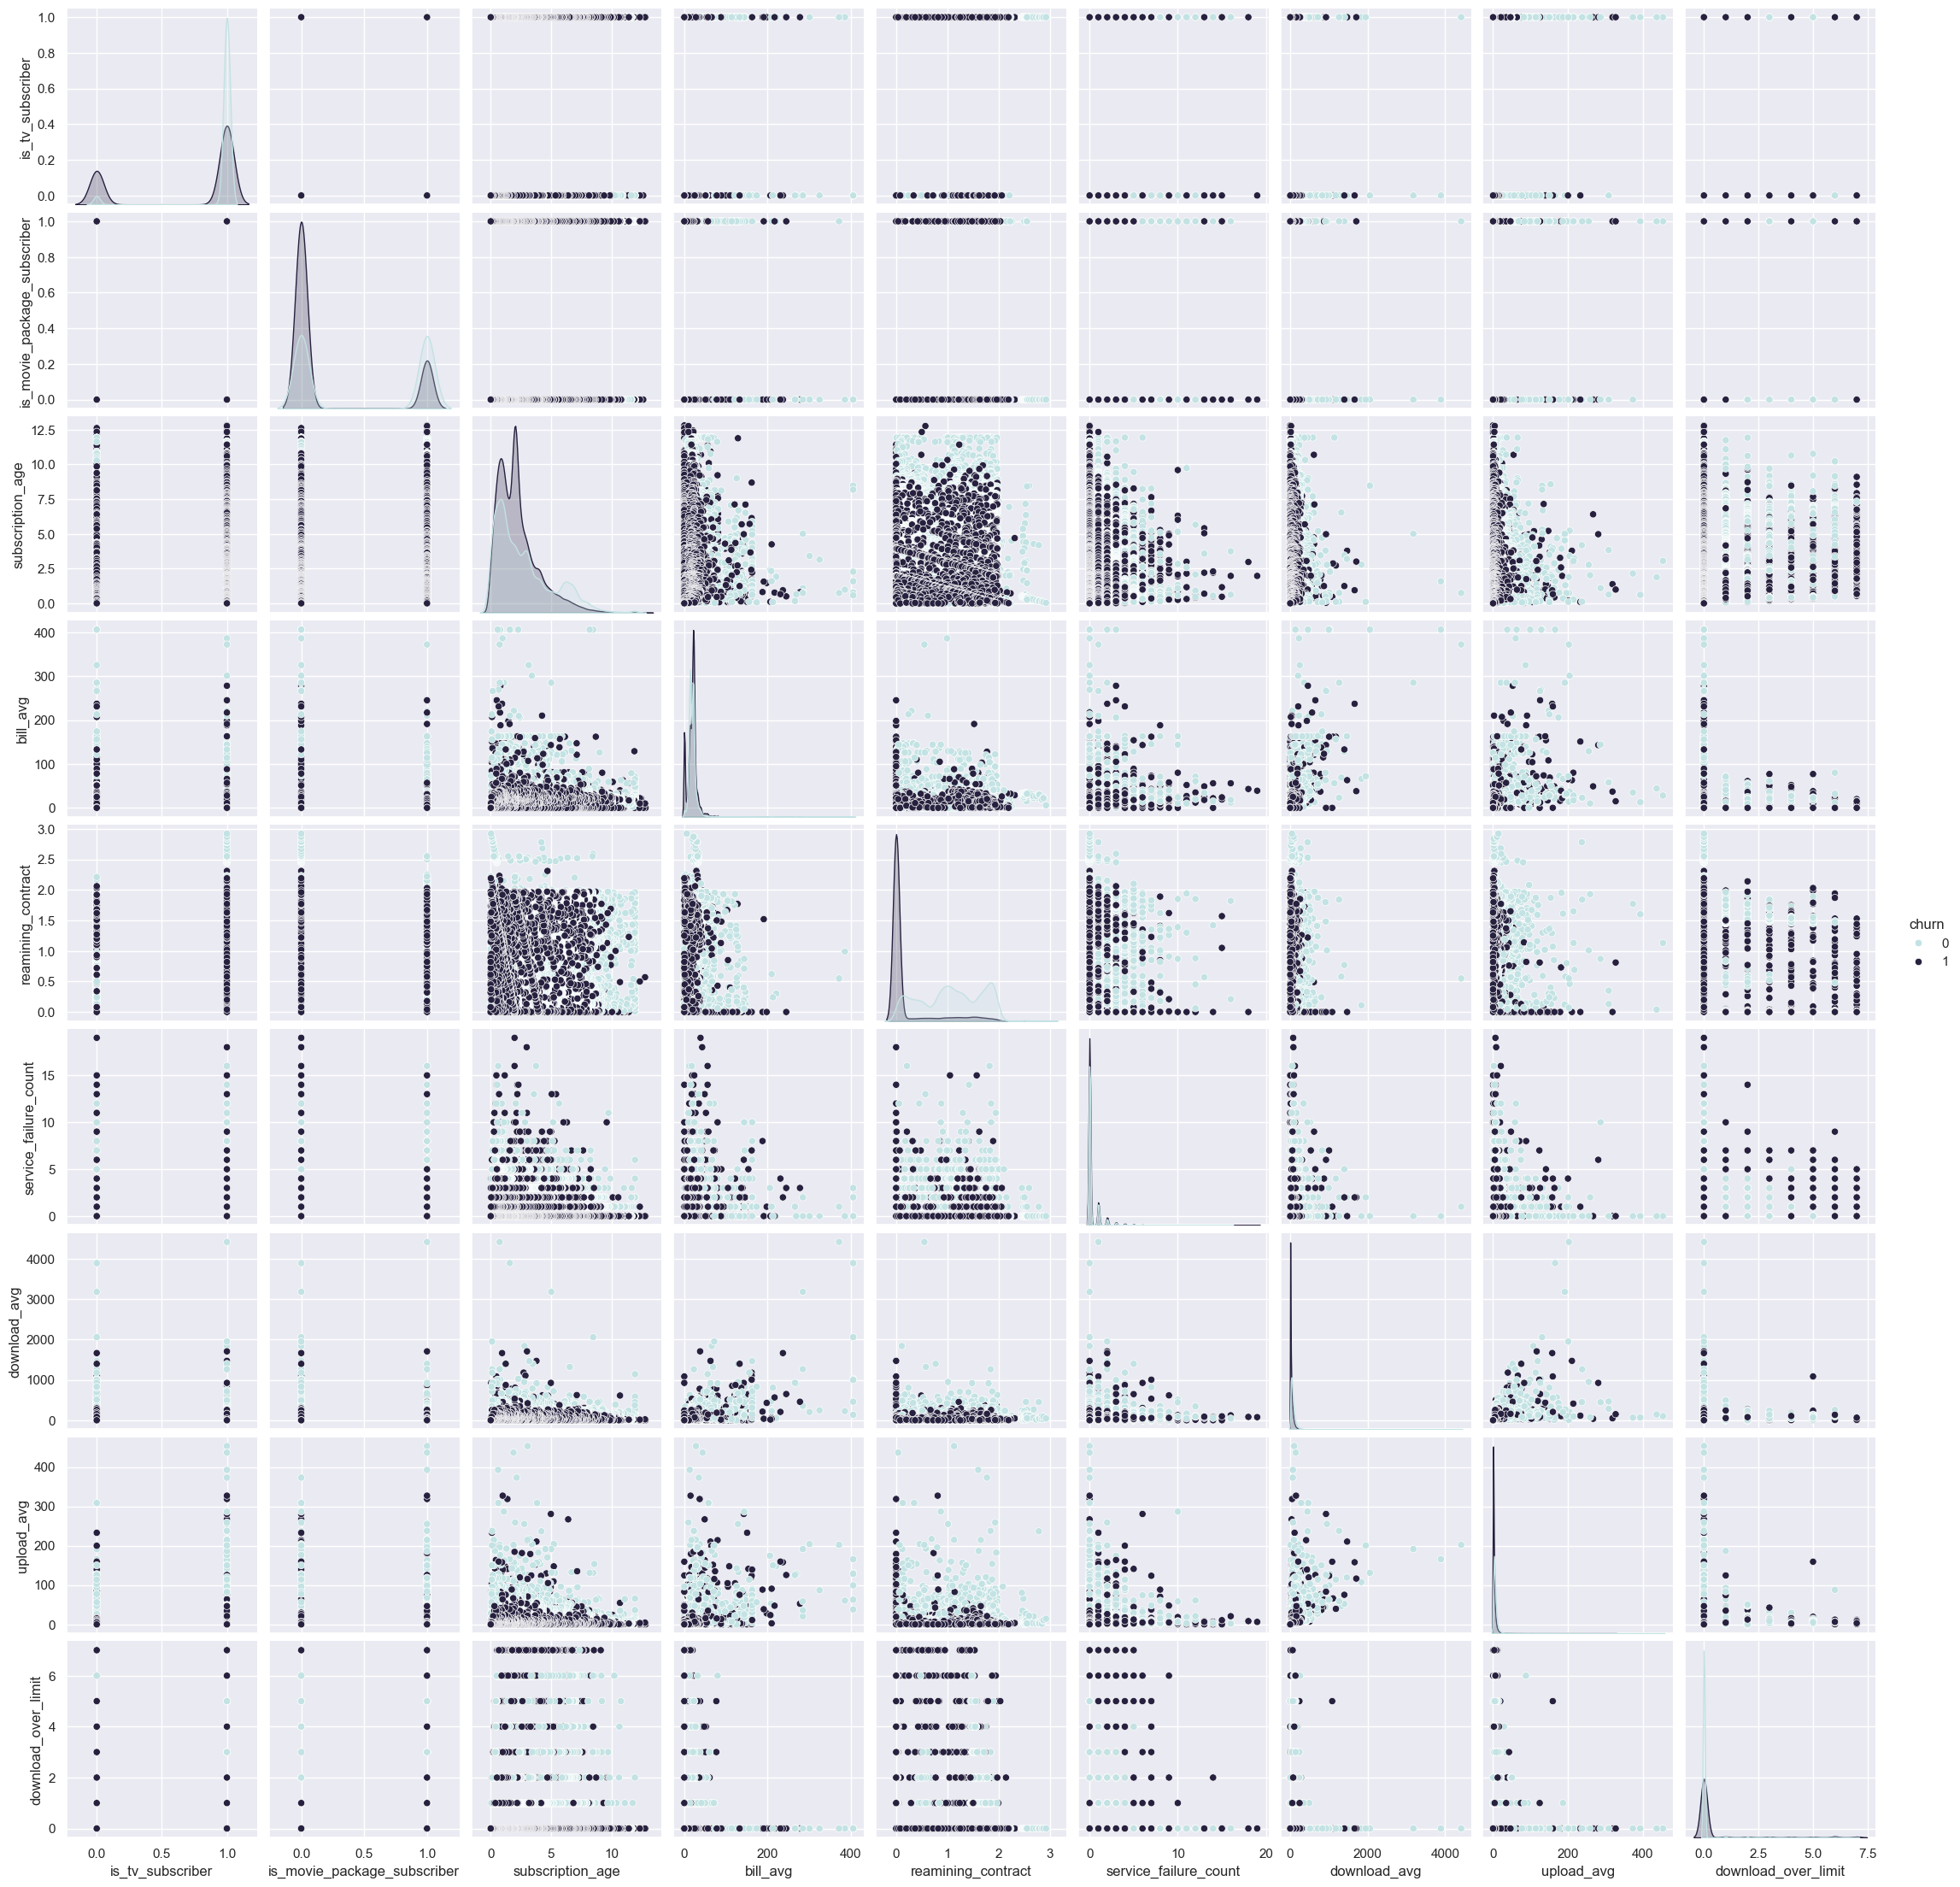

In [25]:
# pairplot
df.dropna()
sns.pairplot(df.drop('id', axis = 1), hue = 'churn', palette= 'ch:start=.2,rot=-.3') # we don't need id column for our task
plt.show()

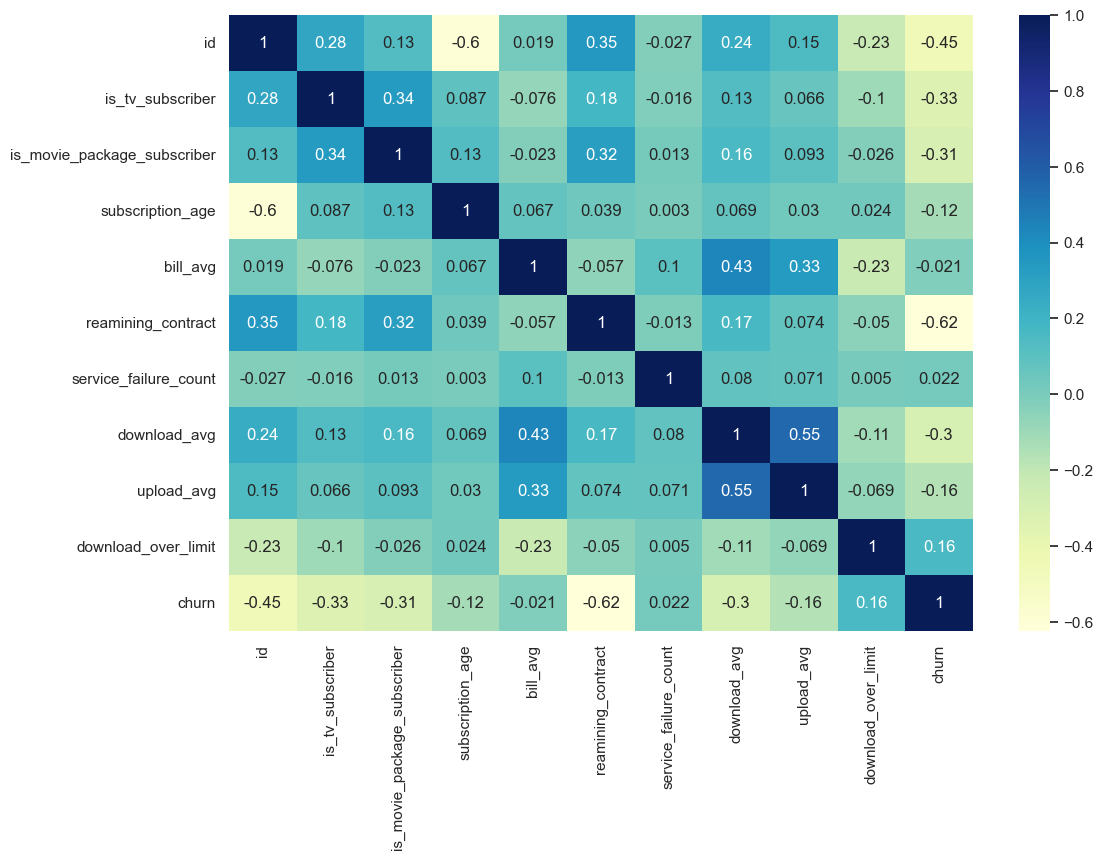

In [26]:
# heatmap to find correlation

plt.figure(figsize = (12,8))
sns.heatmap(np.round(df.corr(), 3), annot= True,  cmap= 'YlGnBu')
plt.show()

Here some of the variable are positively correlated like the bill age is related to the download_avg and the download_avg with upload_avg, and also the tv_subscription is related to movie subscription.

On the other hand some of are negatively correlated like the remaining_contact is highly negatively correlated to churn. That's means decreasing the number of remaining contact may happen to churn.

##### This is the end of our EDA. In next step I'll perform feature engineering or data cleaning part

## Data Cleaning / Feature Engineering

In [27]:
# First I'll take care of the missing values
# check the missing vlaue
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [28]:
# Taking care of "reamining_contract"
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())

In [29]:
# For the rest two fetures I'll use mean to impute them.
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

In [30]:
df.isnull().mean()

id                             0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
reamining_contract             0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
churn                          0.0
dtype: float64

Removing all NaN values from the dataset we got a complete dataset. Now let's remove id column which is not requried for this task

In [31]:
# removing id column
df.drop('id', axis = 1, inplace = True)

### Feature Selection
For this notebook I'll use "Feature Importance" technique

In [32]:
# Now first let's seperate the target from the features

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [33]:
# checking the shape of training set
x.shape

(72274, 9)

In [34]:
# first let's split the dataset into train & test set after that I'll perform feature selection.
# This because if we done this step before spliting this may cause bias
# spliting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(57819, 9) (14455, 9) (57819,) (14455,)


In [35]:
# For this notebook I'll use "Feature Importance" method
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.07601104 0.04506998 0.08807479 0.07892232 0.52858059 0.01073558
 0.08826238 0.0670099  0.01733342]


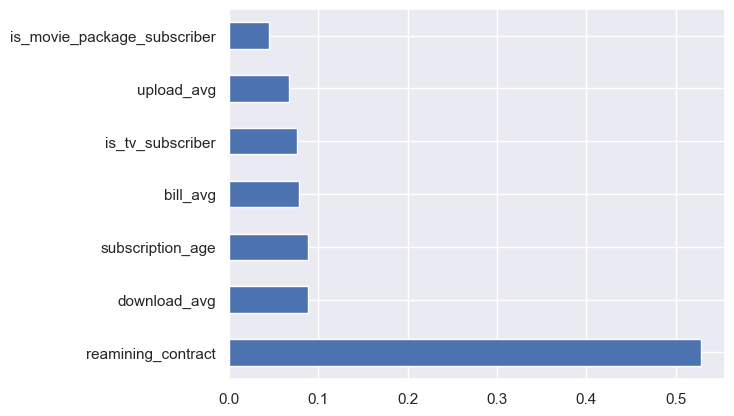

In [36]:
# Let's use a plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

Here we've choice these 7 features that explain almost 99% of the target prediction.

In [37]:
# columns of train set
x_train.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit'],
      dtype='object')

In [38]:
# keeping the top 7 features let's drop other features from our dataset
x_train.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1, inplace = True)

In [39]:
# Let's do same for the test set
x_test.drop(['service_failure_count','download_over_limit'], 
             axis = 1, inplace = True)

In [40]:
# check the shape of training set
x_train.shape

(57819, 7)

In [41]:
x_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
45705,0,0,2.79,17,0.57,16.5,2.0
42542,1,0,1.56,22,0.00,24.1,1.1
5359,1,1,2.65,21,0.50,0.0,0.0
1475,0,0,3.90,21,0.57,0.0,0.0
23478,0,0,2.59,24,0.57,25.7,2.1


In [42]:
# Before applying Machine Learning Let's scale the data
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

We've selectted top five predictors for this prediction. Now We will implement Machine Learning.

In this notebook I'll apply several Machine learning algorithm so that I can obtain the best performing algorithm.

## Machine Learning

#### LogisticRegression Classifier

In [43]:
log_cls = LogisticRegression(random_state=41, max_iter=75) # creating instance
log_cls.fit(x_train, y_train) # fitting the traing data

# Predicting for the test data
log_pred = log_cls.predict(x_test)

In [44]:
# let's create confusion matrix to see the accuracy
cm = confusion_matrix(y_test, log_pred)
cm

array([[4956, 1525],
       [ 877, 7097]])

In [45]:
# The accuracy from logistic regression classifier

log_accuracy = (4956+7097)/(4956+7097+1525+877)
log_accuracy

0.8338291248702872

In [46]:
# precision
log_pre = precision_score(y_test, log_pred)
log_pre

0.8231268847135236

In [47]:
# recall
log_rec = recall_score(y_test, log_pred)
log_rec

0.8900175570604465

We got a high precision & recall value which is good for a model like this.

#### KNeighborsClassifier

In [48]:
kn_cls = KNeighborsClassifier(n_neighbors=10, metric= 'minkowski', p =2)
kn_cls.fit(x_train, y_train) # fitting the model

# predicting output
kn_pred = kn_cls.predict(x_test)

In [49]:
# Creating confusion matrix
cm_kn = confusion_matrix(y_test, kn_pred)
print(cm_kn)

[[5936  545]
 [ 903 7071]]


In [50]:
# Accuracy from KNN

knn_accuracy = (5936+7071)/(5936+545+903+7071)
knn_accuracy

0.8998270494638534

With KNeighboursClassifier we got 89.9% of accuracy

In [51]:
# precision
knn_pre = precision_score(y_test, kn_pred)
knn_pre

0.9284401260504201

In [52]:
# recall
knn_rec = recall_score(y_test, kn_pred)
knn_rec

0.8867569601203913

KNN algoritm has higher precision & recall value than logistic model

#### DecisionTreeClassifier


In [53]:
d_tree = DecisionTreeClassifier(criterion='entropy') # creating instance
d_tree.fit(x_train, y_train) # fitting the training data

# predicting the 
d_tree_pred = d_tree.predict(x_test)

In [54]:
cm_d_tree = confusion_matrix(y_test, d_tree_pred)
cm_d_tree

array([[5878,  603],
       [ 675, 7299]])

In [55]:
d_tree_acc = (5868+7289)/(5868+613+685+7289)
print(d_tree_acc)

0.9102040816326531


With KNeighboursClassifier we got 91.02% of accuracy

In [56]:
# precision
d_tree_pre = precision_score(y_test, d_tree_pred)
d_tree_pre

0.9236902050113895

In [57]:
# recall
d_tree_rec = recall_score(y_test, d_tree_pred)
d_tree_rec

0.9153498871331829

Decision Tree algoritm has more higher precision & recall value than KNN

#### RandomForestClassifier

In [58]:
random_forest = RandomForestClassifier(n_estimators= 13, criterion='entropy')
random_forest.fit(x_train, y_train) # fitting the model

# predicting 
random_pred = random_forest.predict(x_test)

In [59]:
cm_random = confusion_matrix(y_test, random_pred)
cm_random

array([[6087,  394],
       [ 550, 7424]])

In [60]:
random_acc = (6149+7360)/(6149+332+614+7360)
print("Accuracy: {}".format(random_acc))

Accuracy: 0.934555517122103


With RandomForestClassifier we've got an accuracy of 93.45% which is good. Let's use two more classifer

In [61]:
# precision
random_pre = precision_score(y_test, random_pred)
random_pre

0.9496034791506779

In [62]:
# recall
random_rec = recall_score(y_test, random_pred)
random_rec

0.9310258339603712

#### Support Vector Machine Classifier

In [63]:
svc = SVC(kernel= 'sigmoid', random_state= 41)
svc.fit(x_train, y_train)

# prediction
svc_pred = svc.predict(x_test)

In [64]:
cm_svc = confusion_matrix(y_test, svc_pred)
cm_svc

array([[4583, 1898],
       [1813, 6161]])

In [65]:
svc_accuracy = (4583+6161)/(4583+1898+1813+6161)
print(svc_accuracy)

0.7432722241438948


With Support Vector Machine Classifier we've got an accuracy of 74.32%

In [66]:
# precision
svc_pre = precision_score(y_test, svc_pred)
svc_pre

0.7644869090457873

In [67]:
# recall
svc_rec = recall_score(y_test, svc_pred)
svc_rec

0.77263606721846

SVC model perform not so good and it's precision & recall value are less than previous models

#### GaussianNB

In [68]:
nb_log = GaussianNB()
nb_log.fit(x_train, y_train) # fitting the data

# predicting
nb_pred = nb_log.predict(x_test)

In [69]:
cm_nb = confusion_matrix(y_test, nb_pred)
cm_nb

array([[4635, 1846],
       [1209, 6765]])

In [70]:
nb_acc = (4635+6765)/(4635+1846+1209+6765)
print(nb_acc)

0.788654444828779


With GaussianNB we've got an accuracy of 78.86%

In [71]:
# precision
nb_pre = precision_score(y_test, nb_pred)
nb_pre

0.7856230402972941

In [72]:
# recall
nb_rec = recall_score(y_test, nb_pred)
nb_rec

0.8483822422874342

GaussianNB model perform not so good and it's precision & recall value are less than previous models except Support Vector Regressor

### Performance at a Glance

In [73]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_accuracy, knn_accuracy, d_tree_acc, random_acc, svc_accuracy, nb_acc],
              'Precision':[log_pre, knn_pre, d_tree_pre, random_pre, svc_pre, nb_pre],
              'Recall': [log_rec, knn_rec, d_tree_rec, random_rec, svc_rec, nb_rec]}

In [74]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                          'DecisionTree', 'RandomForest',
                                                          'SVC', 'GaussianNB'])

In [75]:
performance_df

,Accuracy_Score,Precision,Recall
Logistic Regression,0.833829,0.823127,0.890018
KNeighbors,0.899827,0.928440,0.886757
DecisionTree,0.910204,0.923690,0.915350
RandomForest,0.934556,0.949603,0.931026
SVC,0.743272,0.764487,0.772636
GaussianNB,0.788654,0.785623,0.848382


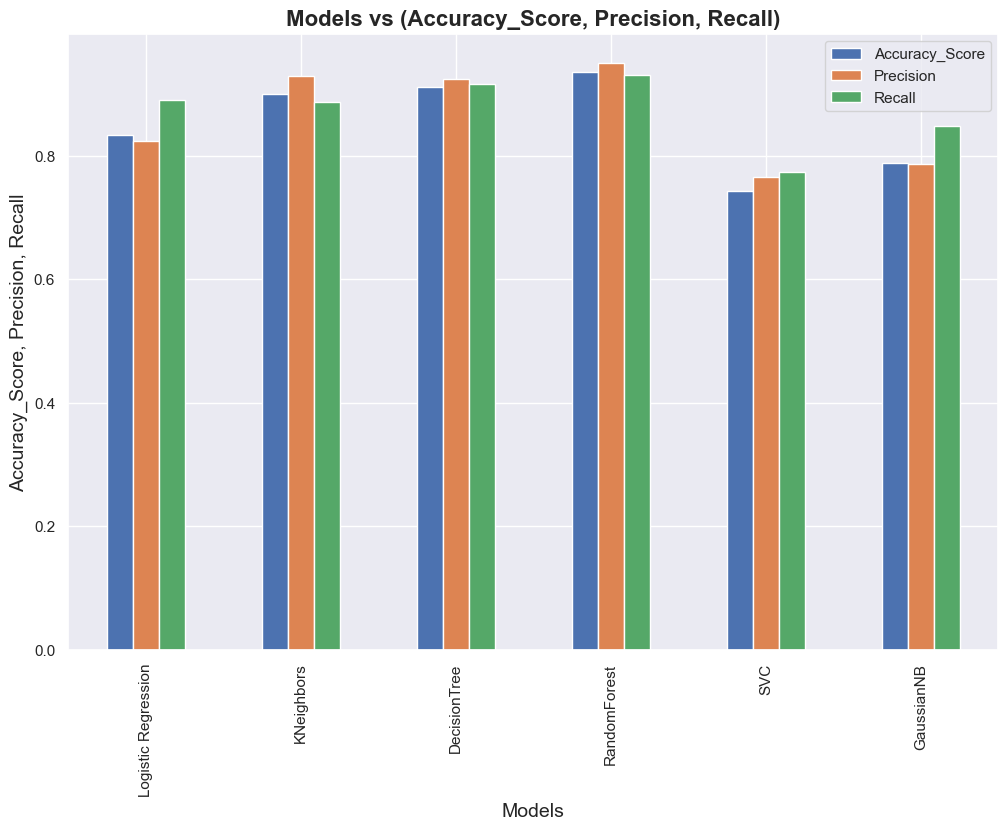

In [76]:
# Model performance chart

performance_df.plot(kind="bar", figsize=(12,8))
plt.title('Models vs (Accuracy_Score, Precision, Recall)', fontdict= {'weight': 'bold',
        'size': 16})
plt.xlabel('Models', fontdict= {'size': 14})
plt.ylabel('Accuracy_Score, Precision, Recall',fontdict= {'size': 14})
plt.show()

Here we can see the top three algorithm for this problem is "KNeighbour, Decision Tree & Random Forest" SO, for this problem anyone of these there can be used.

In [77]:
# Import pickle for model serialization
import pickle

# Save the best performing model (RandomForestClassifier) as model.pkl
# RandomForest achieved the highest accuracy of 93.45%
with open('model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

# Save the scaler for preprocessing new data
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scale, file)

print("Best model (RandomForestClassifier) saved as 'model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print(f"Model Accuracy: {random_acc:.4f}")
print(f"Model Precision: {random_pre:.4f}")
print(f"Model Recall: {random_rec:.4f}")

Best model (RandomForestClassifier) saved as 'model.pkl'
Scaler saved as 'scaler.pkl'
Model Accuracy: 0.9346
Model Precision: 0.9496
Model Recall: 0.9310
